In [10]:
import pandas
import numpy
from matplotlib import pyplot
import seaborn
import tensorflow
import keras

%matplotlib inline
pyplot.rcParams['font.family'] = 'serif'
pyplot.rcParams['font.size'] = 16

## Part 1 Titanic

In [6]:
raw_data = pandas.read_excel('titanic.xls')

In [7]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
pclass       1309 non-null int64
survived     1309 non-null int64
name         1309 non-null object
sex          1309 non-null object
age          1046 non-null float64
sibsp        1309 non-null int64
parch        1309 non-null int64
ticket       1309 non-null object
fare         1308 non-null float64
cabin        295 non-null object
embarked     1307 non-null object
boat         486 non-null object
body         121 non-null float64
home.dest    745 non-null object
dtypes: float64(3), int64(4), object(7)
memory usage: 143.2+ KB


In [8]:
raw_data.describe()

,pclass,survived,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,0.381971,29.881135,0.498854,0.385027,33.295479,160.809917
std,0.837836,0.486055,14.413500,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


## Part 2 Recognize Hand-write Number

In [11]:
(x_train, y_train),(x_test, y_test) = keras.datasets.mnist.load_data()
x_train.shape
type(x_train[0,0,0])

11493376/11490434 [==============================] - 5s 0us/step


numpy.uint8

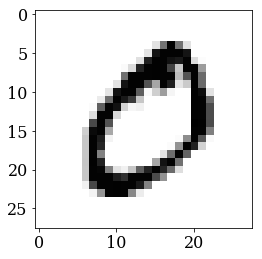

In [12]:
x_train = x_train.reshape(x_train.shape[0], 28, 28,1)
x_train = x_train.astype('float32') / 255.
n = 1
pyplot.imshow(x_train[n].reshape(28,28),cmap='Greys', interpolation='nearest')
pyplot.show()

In [15]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers.convolutional import Conv2D,MaxPooling2D
import sys
numpy.random.seed(7)

In [16]:
img_rows = 28
img_cols = 28

(x_train, y_train),(x_test, y_test) = keras.datasets.mnist.load_data()

input_shape = (img_rows, img_cols, 1)
x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)

x_train = x_train.astype('float32')/255.
x_test = x_test.astype('float32')/255.

In [19]:
y_train[0:10]
num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
y_train[0:10]

array([[[[0., 1., 0., ..., 0., 0., 0.],
         [1., 0., 0., ..., 0., 0., 0.],
         [1., 0., 0., ..., 0., 0., 0.],
         ...,
         [1., 0., 0., ..., 0., 0., 0.],
         [1., 0., 0., ..., 0., 0., 0.],
         [1., 0., 0., ..., 0., 0., 0.]],

        [[0., 1., 0., ..., 0., 0., 0.],
         [1., 0., 0., ..., 0., 0., 0.],
         [1., 0., 0., ..., 0., 0., 0.],
         ...,
         [1., 0., 0., ..., 0., 0., 0.],
         [1., 0., 0., ..., 0., 0., 0.],
         [1., 0., 0., ..., 0., 0., 0.]],

        [[0., 1., 0., ..., 0., 0., 0.],
         [1., 0., 0., ..., 0., 0., 0.],
         [1., 0., 0., ..., 0., 0., 0.],
         ...,
         [1., 0., 0., ..., 0., 0., 0.],
         [1., 0., 0., ..., 0., 0., 0.],
         [1., 0., 0., ..., 0., 0., 0.]],

        ...,

        [[0., 1., 0., ..., 0., 0., 0.],
         [1., 0., 0., ..., 0., 0., 0.],
         [1., 0., 0., ..., 0., 0., 0.],
         ...,
         [1., 0., 0., ..., 0., 0., 0.],
         [1., 0., 0., ..., 0., 0., 0.],
    

In [20]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(5,5), strides=(1,1), padding='same', activation='relu',input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Conv2D(64, (2,2), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(1000, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

In [22]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        832       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 64)        8256      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 7, 7, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 3136)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 1000)              3137000   
__________

In [23]:
batch_size = 128
epochs = 12

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

hist = model.fit(x_train, y_train, batch_size = batch_size, epochs = epochs, verbose=1, validation_data=(x_test, y_test))

ValueError: Error when checking target: expected dense_2 to have 2 dimensions, but got array with shape (60000, 10, 10, 10)

In [24]:
pyplot.figure(figsize=(12,8))
pyplot.plot(hist.history['loss'])
pyplot.plot(hist.history['val_loss'])
pyplot.plot(hist.history['acc'])
pyplot.plot(hist.history['val_acc'])
pyplot.legend(['loss', 'val_loss', 'acc', 'val_acc'])
pyplot.show()

NameError: name 'hist' is not defined

<Figure size 864x576 with 0 Axes>